In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, threshold=np.nan)
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('villes.csv', sep=';')
X = data.ix[:,1:13].values
labels = data.ix[:,0].values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
res = []
nb_component = 0
while sum(res) < .7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit(X_scaled)
    pca.transform(X_scaled)
    res = pca.explained_variance_ratio_
print('Il faut retenir {} axe(s) pour expliquer 70% de la variance'.format(nb_component))

Il faut retenir 1 axe(s) pour expliquer 70% de la variance


In [3]:
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
# transformation du jeu de donnée
X_pca = pca2.transform(X_scaled)

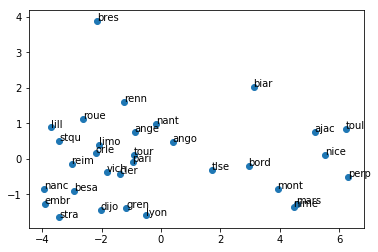

In [4]:
plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Donnée crime

In [5]:
data2 = pd.read_csv('crime.csv', sep=';')
X2 = data2.ix[:,1:7].values
labels2 = data2.ix[:,0].values
scaler = StandardScaler()
scaler.fit(X2)
X2_scaled = scaler.transform(X2)
res = []
nb_component = 0
while sum(res) < .7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit(X2_scaled)
    pca.transform(X2_scaled)
    res = pca.explained_variance_ratio_
print('Il faut retenir {} axe(s) pour expliquer 70% de la variance'.format(nb_component))

Il faut retenir 2 axe(s) pour expliquer 70% de la variance


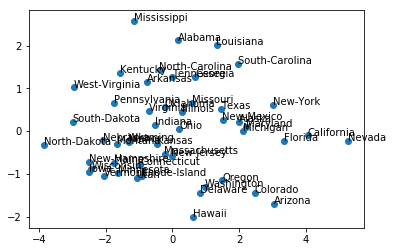

In [6]:
X2_pca = pca.transform(X2_scaled)
plt.scatter(X2_pca[:,0], X2_pca[:,1])
for label, x, y in zip(labels2, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2_scaled)
clustering = kmeans.predict(X2_scaled)

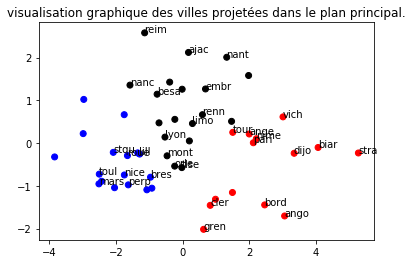

In [8]:
import matplotlib
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=clustering,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.title("visualisation graphique des villes projetées dans le plan principal.")
plt.show()

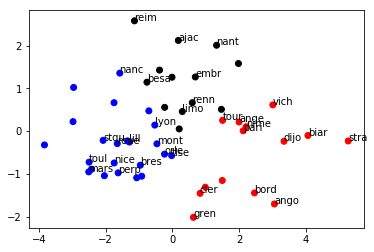

In [9]:
agglo = AgglomerativeClustering(linkage='ward', n_clusters=3)
c2 = agglo.fit_predict(X2_scaled)
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=c2,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

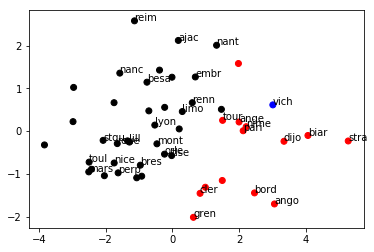

In [10]:
agglo = AgglomerativeClustering(linkage='average', n_clusters=3)
c2 = agglo.fit_predict(X2_scaled)
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=c2,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

On voit que les clusters trouvés ne sont pas les mêmes si on change le linkage

In [11]:
from sklearn import metrics
m = -np.Inf
res = -1
for i in np.arange(2,6):
    clust = KMeans(n_clusters=i).fit_predict(X2_scaled)
    if metrics.silhouette_score(X2_scaled, clust, metric='euclidean') > m:
        res = i
        m = metrics.silhouette_score(X2_scaled, clust, metric='euclidean')
print("le meilleur nombre de clusters pour le critère 'silhouette index' est {}".format(res))

le meilleur nombre de clusters pour le critère 'silhouette index' est 2


In [12]:
def dunn(c, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    """
    unique_cluster_distances = np.unique(min_cluster_distances(c, distances))
    max_diameter = max(diameter(c, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter

def min_cluster_distances(c, distances):
    """Calculates the distances between the two nearest points of each cluster"""
    min_distances = np.zeros((max(c) + 1, max(c) + 1))
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != c[ii] and distances[i, ii] > min_distances[c[i], c[ii]]:
                min_distances[c[i], c[ii]] = min_distances[c[ii], c[i]] = distances[i, ii]
    return min_distances

def diameter(c, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)"""
    diameters = np.zeros(max(c) + 1)
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != -1 or c[ii] != -1 and c[i] == c[ii] and distances[i, ii] > diameters[c[i]]:
                diameters[c[i]] = distances[i, ii]
    return diameters 

In [13]:
from sklearn.metrics import euclidean_distances
m = -np.Inf
res = -1
for i in np.arange(2,6):
    clust = KMeans(n_clusters=i).fit_predict(X2_scaled)
    if dunn(clust, euclidean_distances(X2_scaled, X2_scaled)) > m:
        res = i
        m = dunn(clust, euclidean_distances(X2_scaled, X2_scaled))
print("le meilleur nombre de clusters pour le critère de Dunn est {}".format(res))

le meilleur nombre de clusters pour le critère de Dunn est 2
